In [188]:
import glob
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [50]:
base = './final_report_outputs/'
print(pd.DataFrame(glob.glob(base + "*")).values)

[['./final_report_outputs/cointegration_1_output']
 ['./final_report_outputs/cointegration_2_output']
 ['./final_report_outputs/distance_output_1']
 ['./final_report_outputs/kalman_output_1']
 ['./final_report_outputs/kalman_output_2']
 ['./final_report_outputs/kalman_output_3']]


In [102]:
class GSResult(object):
    def __init__(self, path):
        self.summary = pd.read_csv(path + "/summary.csv")
        self.csv_paths = glob.glob(path + '/*.csv')
        self.csv_paths.remove(path + '/summary.csv')
        self.d = {}
        
        for p in self.csv_paths:
            uuid = os.path.splitext(os.path.basename(p))[0]
            self.d[uuid] = pd.read_csv(p)
    
    def get(self, uuid):
        return self.d[uuid]
    
    @property
    def uuids(self):
        return [os.path.splitext(os.path.basename(p))[0] for p in self.csv_paths]
    
class GSReader(object):
    def __init__(self, base = './final_report_outputs/', folder = ''):
        self.grid_search_dirs = glob.glob(base + folder + "*")
        self.d = {}
        
#         print(self.grid_search_dirs)
        
        for p in self.grid_search_dirs:
            key = os.path.basename(p)
            self.d[key] = GSResult(p)
    
    def get(self, key):
        return self.d[key]
    
    @property
    def dirs(self):
        return [os.path.basename(p) for p in self.grid_search_dirs] 

In [117]:
kalman_gs = GSReader(folder='kalman_output_3/')
distance_gs = GSReader(folder='distance_output_1/')
cointegration_gs = GSReader(folder='cointegration_2_output/')

In [92]:
kalman_gs.dirs

['grid-search-2019-04-14_00-08-39-956',
 'grid-search-2019-04-14_00-13-08-354',
 'grid-search-2019-04-14_00-16-40-212',
 'grid-search-2019-04-14_00-20-49-505',
 'grid-search-2019-04-14_00-24-23-139',
 'grid-search-2019-04-14_00-28-19-330',
 'grid-search-2019-04-14_00-31-49-612',
 'grid-search-2019-04-14_00-36-22-722']

In [93]:
folder = kalman_gs.dirs[0]
kalman_gs.get(folder).summary

,enter_threshold_size,exit_threshold_size,loss_limit,avg_sharpe_ratio,median_sharpe_ratio,avg_overall_return,median_overall_return,overall_return_std,uuid
0,2.0,0.5,-0.10,-0.302233,-0.368736,0.007784,0.000000,0.149797,3d8de3a7-53cf-490a-8e75-19ed014b2b64
1,2.0,0.5,-0.05,-0.574604,-1.110858,-0.014100,-0.002348,0.122717,ce1f75f8-947e-47a5-9b2a-bb5f19fde1d1
2,1.0,0.5,-0.10,-0.070072,0.119207,0.072771,0.023297,0.230219,1697bcb6-769b-40cb-babe-51b52631b624
3,1.0,0.5,-0.05,-5.263931,-0.346933,0.024344,-0.006780,0.214499,f11d1e45-639a-4759-a63c-b0e3c27d2c48


In [94]:
kalman_gs.get('grid-search-2019-04-14_00-08-39-956').uuids

['1697bcb6-769b-40cb-babe-51b52631b624',
 '3d8de3a7-53cf-490a-8e75-19ed014b2b64',
 'ce1f75f8-947e-47a5-9b2a-bb5f19fde1d1',
 'f11d1e45-639a-4759-a63c-b0e3c27d2c48']

In [95]:
df = kalman_gs.get('grid-search-2019-04-14_00-08-39-956').get('1697bcb6-769b-40cb-babe-51b52631b624')

In [96]:
df.head(10)

,endcash,pair,profit,returnstd,sharperatio,startcash
0,9.092936e+05,MODN-OMC,-0.090706,17170.155163,-0.601226,1000000
1,7.049842e+05,HUBS-IPG,-0.295016,13878.147228,-1.067793,1000000
2,1.455983e+06,MODN-SAP,0.455983,19302.992883,1.188774,1000000
3,1.000000e+06,IBM-SQNS,0.000000,0.000000,NaN,1000000
4,7.713071e+05,URI-WIT,-0.228693,17474.146866,-1.013908,1000000
5,1.346284e+06,URI-VMW,0.346284,19319.152757,0.942244,1000000
6,8.727292e+05,CACI-PANW,-0.127271,21313.119758,-0.356468,1000000
7,8.834762e+05,CACI-QTM,-0.116524,13513.239132,-1.171639,1000000
8,8.108405e+05,CACI-HIVE,-0.189160,9801.224979,-1.663236,1000000
9,1.023603e+06,CRM-PANW,0.023603,1434.963167,0.152666,1000000


In [229]:
def plot_rs_dist(rs, fig_name, fig_title):
#     return_in_percent = np.array(rs) / rl_constants.initial_cash
    stat = plt.hist(rs, bins=20)
    
    mean = rs.mean()
    median = np.median(rs)
    
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean: {:.3f}'.format(mean))
    plt.axvline(median, color='y', linestyle='dashed', linewidth=1, label='Median: {:.3f}'.format(median))
    
    plt.gcf().set_size_inches(14, 7)
    
    if len(fig_title) != 0:
        plt.suptitle(fig_title)
    plt.xlabel('return')
    plt.ylabel('frequency')
    plt.legend(loc='upper right')
    print(stat)
#     plt.savefig(join(plot_folder_path, fig_name+'.png'))
    print('Number of pairs:', len(rs))
    print('Mean return over all pairs: {:.4f}'.format(np.mean(rs)))
    
def plot_rs_dist(rs, fig_name, fig_title, mean=False, median=False, color=None, methodName=None):
    return_in_percent = np.array(rs)
#     stat = plt.hist(return_in_percent, bins=30, weights=np.ones(len(return_in_percent)) / len(return_in_percent))
    y, binEdges = np.histogram(return_in_percent, bins=30, density=True)
    
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.plot(bincenters,y,'-', color=color, label=methodName)
    
    mean_stat = return_in_percent.mean()
    median_stat = np.median(return_in_percent)
    
    if mean:
        plt.axvline(mean_stat, color=color, linestyle='dashed', linewidth=1, label=methodName+' Mean: {:.3f}'.format(mean_stat))
    if median:
        plt.axvline(median_stat, color=color, linestyle='dashed', linewidth=1, label=methodName+' Median: {:.3f}'.format(median_stat))
    
    plt.gcf().set_size_inches(14, 7)
#     plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    
    if len(fig_title) != 0:
        plt.suptitle(fig_title)
    plt.xlabel('Annualized Return')
    plt.ylabel('density of the distribution of all pairs')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlim(-1, 2)
#     print(stat)
#     plt.savefig(join(plot_folder_path, fig_name+'.png'))
    print('Number of pairs:', len(return_in_percent))
    print('Mean return over all pairs: {:.4f}'.format(np.mean(return_in_percent)))

No handles with labels found to put in legend.


Number of pairs: 60
Mean return over all pairs: 0.0728


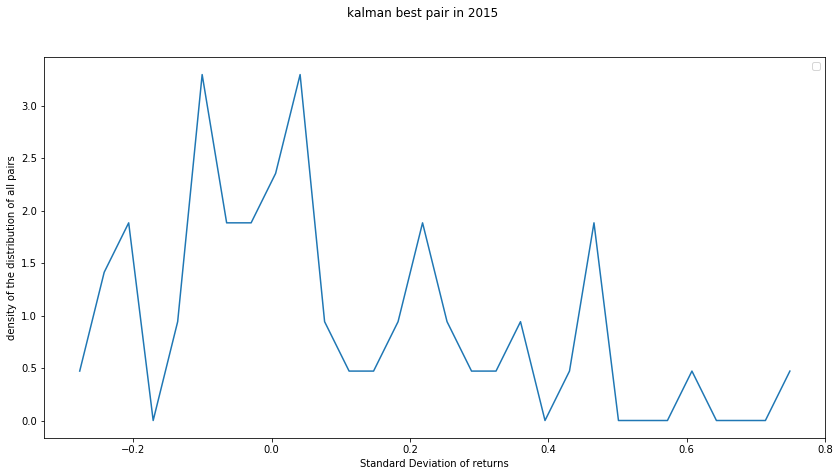

In [115]:
plot_rs_dist(df['profit'], "", "kalman best pair in 2015")

In [118]:
kalman_gs = GSReader(folder='kalman_output_3/')
distance_gs = GSReader(folder='distance_output_1/')
cointegration_gs = GSReader(folder='cointegration_2_output/')

In [212]:
# TECH stocks
# 2015
# kalman_2015 = kalman_gs.get('grid-search-2019-04-14_00-08-39-956').get('1697bcb6-769b-40cb-babe-51b52631b624')
# distance_2015 = distance_gs.get('grid-search-2019-04-13_23-38-38-625').get('243ed1ab-f0fb-403d-8e10-b47929bd51bd')
# cointegration_2015 = cointegration_gs.get('grid-search-2019-04-13_21-47-13-877').get('9cc83f42-33e0-4114-9661-751ae9224a68')

# 2016
kalman_2016_t = kalman_gs.get(kalman_gs.dirs[1]).get('3140f9a2-597a-4b66-a2f2-0cfe05720f87')
distance_2016_t = distance_gs.get(distance_gs.dirs[1]).get('406ba7da-b851-4649-a16a-4b18fcd94d4d')
cointegration_2016_t = cointegration_gs.get(cointegration_gs.dirs[1]).get('242f7bea-b98d-448e-84b0-6dfaa4bd64b6')

# 2017 
kalman_2017_t = kalman_gs.get(kalman_gs.dirs[2]).get('cf8d5b4f-4e1f-44d5-9825-7033ebdd1222')
distance_2017_t = distance_gs.get(distance_gs.dirs[2]).get('0488b7fc-45be-4c75-89c6-31607169e130')
cointegration_2017_t = cointegration_gs.get(cointegration_gs.dirs[2]).get('3d6bb2f6-f763-4858-bb0d-372ed4294251')

# 2018
kalman_2018_t = kalman_gs.get(kalman_gs.dirs[3]).get('dc2d0970-3ea8-4ddf-8bb5-14430eda1bec')
distance_2018_t = distance_gs.get(distance_gs.dirs[3]).get('15162f92-1e86-4805-9869-5219b32b1738')
cointegration_2018_t = cointegration_gs.get(cointegration_gs.dirs[3]).get('08713a18-5840-4eaf-9d3e-876223175b3c')

In [226]:
kalman_gs.dirs

['grid-search-2019-04-14_00-08-39-956',
 'grid-search-2019-04-14_00-13-08-354',
 'grid-search-2019-04-14_00-16-40-212',
 'grid-search-2019-04-14_00-20-49-505',
 'grid-search-2019-04-14_00-24-23-139',
 'grid-search-2019-04-14_00-28-19-330',
 'grid-search-2019-04-14_00-31-49-612',
 'grid-search-2019-04-14_00-36-22-722']

In [213]:
# ENERGY stocks
# 2016
kalman_2016 = kalman_gs.get(kalman_gs.dirs[5]).get('ee009315-187f-40ae-bedb-e0ff42d7f5c5')
distance_2016 = distance_gs.get(distance_gs.dirs[5]).get('393e2278-3237-46e3-bbdb-cecf8fa64431')
cointegration_2016 = cointegration_gs.get(cointegration_gs.dirs[5]).get('63f651c0-9174-4551-a53f-f1c44cf2e2db')

# 2017 
kalman_2017 = kalman_gs.get(kalman_gs.dirs[6]).get('7c405a8a-08e6-4bbd-bb6d-8bbea91c2737')
distance_2017 = distance_gs.get(distance_gs.dirs[6]).get('5323c22c-3678-4b4f-9634-ba6221ffc6e9')
cointegration_2017 = cointegration_gs.get(cointegration_gs.dirs[6]).get('bb2451ed-6956-437a-9f5d-2f61275bf1c5')

# 2018
kalman_2018 = kalman_gs.get(kalman_gs.dirs[7]).get('2bc1e0db-ffd1-478d-9a8c-80406abd5cce')
distance_2018 = distance_gs.get(distance_gs.dirs[7]).get('412f5fc8-fd3f-4bd8-899f-4ff24fbd5cd0')
cointegration_2018 = cointegration_gs.get(cointegration_gs.dirs[7]).get('0ad65a5a-a6eb-40e1-a7df-f9c2c600f22e')

In [166]:
rl_2016 = None
rl_2017 = None
rl_2018 = None

with open("final_report_outputs/test_tech_1.txt", "r") as myfile:
    rl_2016 = eval(myfile.readlines()[0])
    
with open("final_report_outputs/test_tech_2.txt", "r") as myfile:
    rl_2017 = eval(myfile.readlines()[0])
    
with open("final_report_outputs/test_tech_3.txt", "r") as myfile:
    rl_2018 = eval(myfile.readlines()[0])

Number of pairs: 47
Mean return over all pairs: 0.0428
Number of pairs: 6670
Mean return over all pairs: 0.3269
Number of pairs: 133
Mean return over all pairs: 0.0286
Number of pairs: 238
Mean return over all pairs: 0.0321


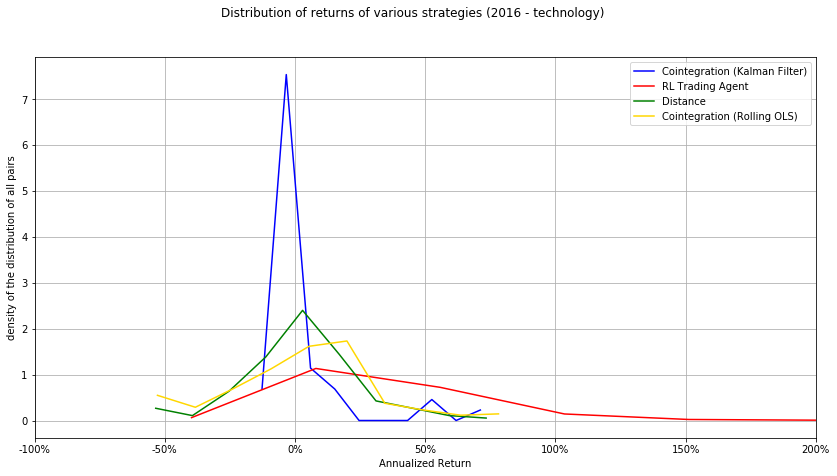

In [214]:
fig_title = "Distribution of returns of various strategies (2016 - technology)"
plot_rs_dist(kalman_2016_t['profit'], "", fig_title, mean=False, median=False, color="blue", methodName="Cointegration (Kalman Filter)")
plot_rs_dist(np.array(rl_2016) / 10000, "", fig_title, mean=False, median=False, color="red", methodName="RL Trading Agent")
plot_rs_dist(distance_2016_t['profit'], "", fig_title, mean=False, median=False, color="green", methodName="Distance")
plot_rs_dist(cointegration_2016_t['profit'], "", fig_title, mean=False, median=False, color="gold", methodName="Cointegration (Rolling OLS)")
plt.show()

Number of pairs: 57
Mean return over all pairs: 0.0046
Number of pairs: 6670
Mean return over all pairs: 0.4083
Number of pairs: 133
Mean return over all pairs: -0.0179
Number of pairs: 287
Mean return over all pairs: -0.0334


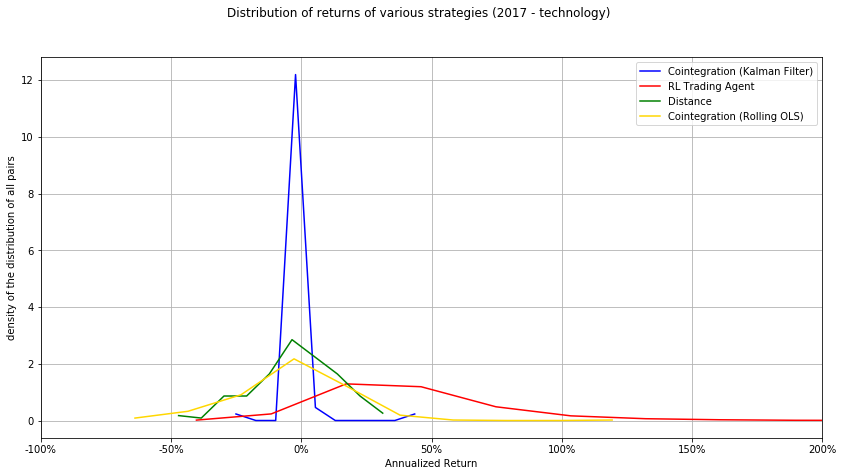

In [208]:
fig_title = "Distribution of returns of various strategies (2017 - technology)"
plot_rs_dist(kalman_2017_t['profit'], "", fig_title, mean=False, median=False, color="blue", methodName="Cointegration (Kalman Filter)")
plot_rs_dist(np.array(rl_2017) / 10000, "", fig_title, mean=False, median=False, color="red", methodName="RL Trading Agent")
plot_rs_dist(distance_2017_t['profit'], "", fig_title, mean=False, median=False, color="green", methodName="Distance")
plot_rs_dist(cointegration_2017_t['profit'], "", fig_title, mean=False, median=False, color="gold", methodName="Cointegration (Rolling OLS)")
plt.show()

Number of pairs: 45
Mean return over all pairs: 0.0026
Number of pairs: 6670
Mean return over all pairs: 0.4378
Number of pairs: 133
Mean return over all pairs: 0.1048
Number of pairs: 229
Mean return over all pairs: -0.0059


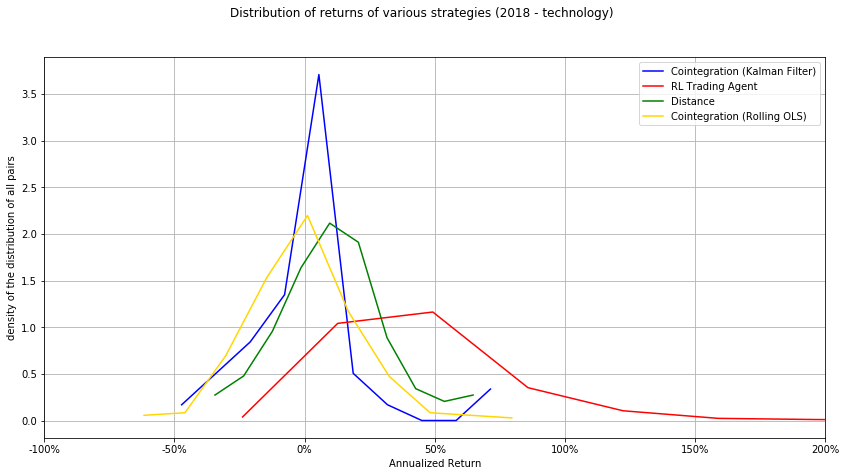

In [209]:
fig_title = "Distribution of returns of various strategies (2018 - technology)"
plot_rs_dist(kalman_2018_t['profit'], "", fig_title, mean=False, median=False, color="blue", methodName="Cointegration (Kalman Filter)")
plot_rs_dist(np.array(rl_2018) / 10000, "", fig_title, mean=False, median=False, color="red", methodName="RL Trading Agent")
plot_rs_dist(distance_2018_t['profit'], "", fig_title, mean=False, median=False, color="green", methodName="Distance")
plot_rs_dist(cointegration_2018_t['profit'], "", fig_title, mean=False, median=False, color="gold", methodName="Cointegration (Rolling OLS)")
plt.show()

In [210]:
rl_2016_e = None
rl_2017_e = None
rl_2018_e = None

with open("final_report_outputs/test_energy_1.txt", "r") as myfile:
    rl_2016_e = eval(myfile.readlines()[0])
    
with open("final_report_outputs/test_energy_2.txt", "r") as myfile:
    rl_2017_e = eval(myfile.readlines()[0])
    
with open("final_report_outputs/test_energy_3.txt", "r") as myfile:
    rl_2018_e = eval(myfile.readlines()[0])

Number of pairs: 47
Mean return over all pairs: 0.0428
Number of pairs: 11935
Mean return over all pairs: 0.5380
Number of pairs: 133
Mean return over all pairs: 0.0286
Number of pairs: 238
Mean return over all pairs: 0.0321


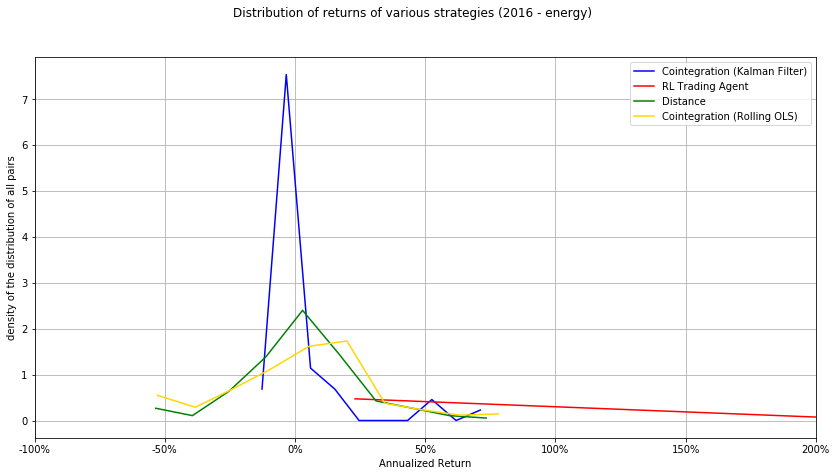

In [216]:
fig_title = "Distribution of returns of various strategies (2016 - energy)"
plot_rs_dist(kalman_2016['profit'], "", fig_title, mean=False, median=False, color="blue", methodName="Cointegration (Kalman Filter)")
plot_rs_dist(np.array(rl_2016_e) / 10000, "", fig_title, mean=False, median=False, color="red", methodName="RL Trading Agent")
plot_rs_dist(distance_2016['profit'], "", fig_title, mean=False, median=False, color="green", methodName="Distance")
plot_rs_dist(cointegration_2016['profit'], "", fig_title, mean=False, median=False, color="gold", methodName="Cointegration (Rolling OLS)")
plt.show()

Number of pairs: 11935
Mean return over all pairs: 0.6960


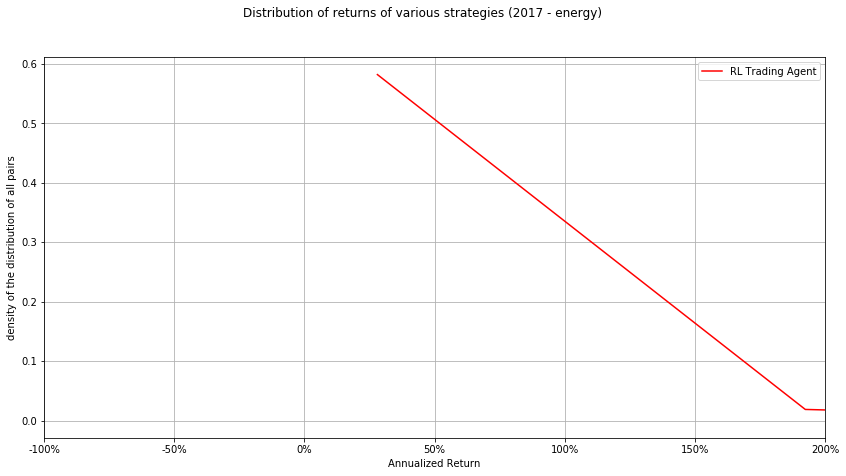

In [233]:
fig_title = "Distribution of returns of various strategies (2017 - energy)"
# plot_rs_dist(kalman_2017['profit'], "", fig_title, mean=False, median=False, color="blue", methodName="Cointegration (Kalman Filter)")
plot_rs_dist(np.array(rl_2017_e) / 10000, "", fig_title, mean=False, median=False, color="red", methodName="RL Trading Agent")
# plot_rs_dist(distance_2017['profit'], "", fig_title, mean=False, median=False, color="green", methodName="Distance")
# plot_rs_dist(cointegration_2017['profit'], "", fig_title, mean=False, median=False, color="gold", methodName="Cointegration (Rolling OLS)")
plt.show()

,endcash,pair,profit,returnstd,sharperatio,startcash
0,1.000000e+06,ASGN-SFUN,0.000000,0.000000,NaN,1000000
1,1.160371e+06,TBI-TGH,0.160371,15811.145424,0.875289,1000000
2,1.000000e+06,AL-SSTK,0.000000,0.000000,NaN,1000000
3,1.000000e+06,ETN-HIVE,0.000000,0.000000,NaN,1000000
4,1.000000e+06,HIVE-RXN,0.000000,0.000000,NaN,1000000
5,8.698279e+05,DDD-NPTN,-0.130172,11645.066594,-1.153643,1000000
6,1.000000e+06,QTWO-SFUN,0.000000,0.000000,NaN,1000000
7,1.000000e+06,IPG-SPA,0.000000,0.000000,NaN,1000000
8,1.034103e+06,DDD-ORCL,0.034103,10863.195810,0.413538,1000000
9,1.758486e+06,CSLT-QTWO,0.758486,32047.762750,0.973632,1000000


In [244]:
columns = ['enter_threshold_size', 'exit_threshold_size', 'loss_limit', 
           'avg_sharpe_ratio', 'median_sharpe_ratio', 'avg_overall_return',
           'median_overall_return', 'overall_return_std']
# print(kalman_gs.get(kalman_gs.dirs[1]).summary[columns].to_latex(index=False))
# print(kalman_gs.get(kalman_gs.dirs[2]).summary[columns].to_latex(index=False))
# print(kalman_gs.get(kalman_gs.dirs[3]).summary[columns].to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 enter\_threshold\_size &  exit\_threshold\_size &  loss\_limit &  avg\_sharpe\_ratio &  median\_sharpe\_ratio &  avg\_overall\_return &  median\_overall\_return &  overall\_return\_std \\
\midrule
                  2.0 &                  0.5 &       -0.10 &         -0.158710 &            -0.064349 &           -0.018564 &               0.000000 &            0.111510 \\
                  2.0 &                  0.5 &       -0.05 &         -0.501058 &            -0.816271 &           -0.020858 &               0.000000 &            0.103610 \\
                  1.0 &                  0.5 &       -0.10 &         -1.351692 &            -0.374700 &            0.002646 &               0.000000 &            0.221902 \\
                  1.0 &                  0.5 &       -0.05 &         -1.669186 &            -0.809022 &           -0.035053 &              -0.004048 &            0.157478 \\
\bottomrule
\end{tabular}



In [251]:
print(cointegration_gs.get(cointegration_gs.dirs[3]).summary[columns].to_latex(index=False))
# print(kalman_gs.get(kalman_gs.dirs[2]).summary[columns].to_latex(index=False))
# print(kalman_gs.get(kalman_gs.dirs[3]).summary[columns].to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 enter\_threshold\_size &  exit\_threshold\_size &  loss\_limit &  avg\_sharpe\_ratio &  median\_sharpe\_ratio &  avg\_overall\_return &  median\_overall\_return &  overall\_return\_std \\
\midrule
                  2.0 &                  0.5 &        -0.5 &         -0.521315 &            -0.527849 &           -0.005908 &              -0.005320 &            0.211914 \\
                  2.0 &                  0.5 &        -0.5 &         -0.402114 &            -0.531833 &           -0.006107 &               0.001783 &            0.220995 \\
                  2.0 &                  0.5 &        -0.5 &         -0.359215 &            -0.542585 &           -0.009350 &              -0.001281 &            0.210937 \\
\bottomrule
\end{tabular}



In [257]:
ls = []

d = {}
d['Label'] = 'Period 0'
d['Period (200 Trading days)'] = '2015-03-19 to 2015-12-31'

ls.append(d)

d = {}
d['Label'] = 'Period 1'
d['Period (200 Trading days)'] = '2016-03-18 to 2016-12-30'

ls.append(d)

d = {}
d['Label'] = 'Period 2'
d['Period (200 Trading days)'] = '2017-03-20 to 2018-01-02'

ls.append(d)

d = {}
d['Label'] = 'Period 3'
d['Period (200 Trading days)'] = '2018-03-20 to 2019-01-03'

ls.append(d)

In [258]:
print(pd.DataFrame(ls).to_latex(index=False))

\begin{tabular}{ll}
\toprule
    Label & Period (200 Trading days) \\
\midrule
 Period 0 &  2015-03-19 to 2015-12-31 \\
 Period 1 &  2016-03-18 to 2016-12-30 \\
 Period 2 &  2017-03-20 to 2018-01-02 \\
 Period 3 &  2018-03-20 to 2019-01-03 \\
\bottomrule
\end{tabular}



In [268]:
ls = []

d = {}
d['Strategy/Portfolio'] = 'Distance'
d['Period 1'] = '+2.86%'
d['Period 2'] = '-1.79%'
d['Period 3'] = '+10.48%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'Cointegration (Kalman Filter)'
d['Period 1'] = '+4.28%'
d['Period 2'] = '+0.46%'
d['Period 3'] = '+0.26%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'Cointegration (Rolling OLS)'
d['Period 1'] = '+3.21%'
d['Period 2'] = '-3.34%'
d['Period 3'] = '-0.59%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'Reinforcement Learning Agent'
d['Period 1'] = '+32.69%'
d['Period 2'] = '+40.83%'
d['Period 3'] = '+43.78%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'S&P 500 Index'
d['Period 1'] = '+9.23%'
d['Period 2'] = '+12.65%'
d['Period 3'] = '−7.60%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'NYSE Arca Technology 100 Index'
d['Period 1'] = '+14.80%'
d['Period 2'] = '+18.74%'
d['Period 3'] = '−7.76%'

ls.append(d)

In [274]:
df = pd.DataFrame(ls)
df = df[['Strategy/Portfolio', 'Period 1', 'Period 2', 'Period 3']]
print(df.to_latex(index=False))

\begin{tabular}{llll}
\toprule
             Strategy/Portfolio & Period 1 & Period 2 & Period 3 \\
\midrule
                       Distance &   +2.86\% &   -1.79\% &  +10.48\% \\
  Cointegration (Kalman Filter) &   +4.28\% &   +0.46\% &   +0.26\% \\
    Cointegration (Rolling OLS) &   +3.21\% &   -3.34\% &   -0.59\% \\
   Reinforcement Learning Agent &  +32.69\% &  +40.83\% &  +43.78\% \\
                  S\&P 500 Index &   +9.23\% &  +12.65\% &   −7.60\% \\
 NYSE Arca Technology 100 Index &  +14.80\% &  +18.74\% &   −7.76\% \\
\bottomrule
\end{tabular}



In [283]:
ls = []

d = {}
d['Strategy/Portfolio'] = 'Reinforcement Learning Agent'
d['Period 1'] = '+53.80%'
d['Period 2'] = '+69.60%'
d['Period 3'] = '+46.02%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'S&P 500 Index'
d['Period 1'] = '+9.23%'
d['Period 2'] = '+12.65%'
d['Period 3'] = '−7.60%'

ls.append(d)

d = {}
d['Strategy/Portfolio'] = 'NYSE Energy Index'
d['Period 1'] = '+2.69%'
d['Period 2'] = '-5.15%'
d['Period 3'] = '-2.58%'

ls.append(d)

In [284]:
df = pd.DataFrame(ls)
df = df[['Strategy/Portfolio', 'Period 1', 'Period 2', 'Period 3']]
print(df.to_latex(index=False))

\begin{tabular}{llll}
\toprule
           Strategy/Portfolio & Period 1 & Period 2 & Period 3 \\
\midrule
 Reinforcement Learning Agent &  +53.80\% &  +69.60\% &  +46.02\% \\
                S\&P 500 Index &   +9.23\% &  +12.65\% &   −7.60\% \\
            NYSE Energy Index &   +2.69\% &   -5.15\% &   -2.58\% \\
\bottomrule
\end{tabular}



In [280]:
np.mean(rl_2017_e) / 10000

0.6960000424415584

In [281]:
np.mean(rl_2018_e) / 10000

0.4601550424908378

In [299]:
print(str(pd.read_csv("./final_report_outputs/system_requirements.csv").to_latex(index=False)))

\begin{tabular}{ll}
\toprule
                                                                 Feature &                                                                  Description \\
\midrule
                                                     Set backtest params &                                                                            - \\
                             Backtest a given pair using Distance method &                              Obtain table of relevant performance statistics \\
          Backtest a given pair using Cointegration (rolling OLS) method &                              Obtain table of relevant performance statistics \\
        Backtest a given pair using Cointegration (Kalman Filter) method &                              Obtain table of relevant performance statistics \\
 Backtest a given pair using Reinforcement Learning trading agent method &                              Obtain table of relevant performance statistics \\
                                

In [298]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
pd.options.display.max_seq_items = 2000
pd.options.display.max_colwidth = 100